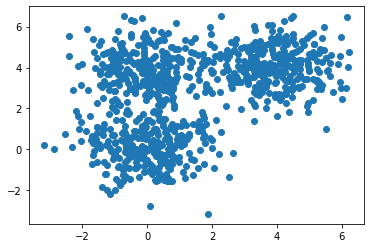

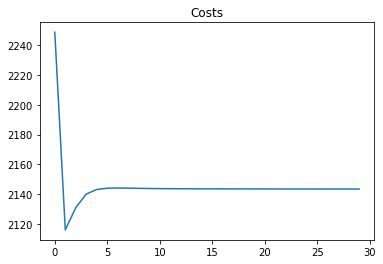

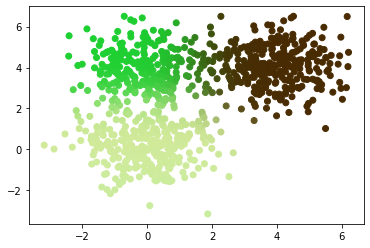

Final cost 2143.513574959309


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

# функция расстояния между двумя векторами u и v, возвращающая квадрат расстояния.
def d(u, v):
    diff = u - v
    return diff.dot(diff)

# Перерасчёт средних значений. Это матричное умножение. N при этом исчезает, поскольку является внутренней размерностью.
def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        # method 1
        # for n in range(len(X)):
        #     cost += R[n,k]*d(M[k], X[n])

        # method 2
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost


# Определим переменные и форму X – матрицу размерностью NxD. 
# Далее инициируем случайные точки X в качестве центров кластеров. После этого вычисляем r_k^((n)).
def plot_k_means(X, K, max_iter=20, beta=3.0, show_plots=False):
    N, D = X.shape
    # R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    initial_centers = np.random.choice(N, K, replace=False)
    M = X[initial_centers]

    costs = []
    k = 0
    for i in range(max_iter):
        k += 1
        for k in range(K):
            for n in range(N):
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))
        R = exponents / exponents.sum(axis=1, keepdims=True)


        # for k in range(K):
        #     M[k] = R[:,k].dot(X) / R[:,k].sum()
        # oldM = M

        # full vectorization
        M = R.T.dot(X) / R.sum(axis=0, keepdims=True).T
        # print("diff M:", np.abs(M - oldM).sum())

# И дополнительный этап – расчёт и вывод на экран функции затрат, рассчитывающую ошибку X при данных значениях R и M. 
# При этом функция будет прекращать работу, когда изменение ошибки станет малым между двумя итерациями.
        c = cost(X, R, M)
        costs.append(c)
        if i > 0:
            if np.abs(costs[-1] - costs[-2]) < 1e-5:
                break

        if len(costs) > 1:
            if costs[-1] > costs[-2]:
                pass
                # print("cost increased!")
                # print("M:", M)
                # print("R.min:", R.min(), "R.max:", R.max())
                
                
# В функции plot_k_means – вывод на экран результатов. 
# Сначала – функции затрат, а затем – данные с кластерами, раскрашенными разными цветами.
    if show_plots:
        plt.plot(costs)
        plt.title("Costs")
        plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.show()

    print("Final cost", costs[-1])
    return M, R


def get_simple_data():
    D = 2 
    s = 4 
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 900
    X = np.zeros((N, D))
    X[:300, :] = np.random.randn(300, D) + mu1
    X[300:600, :] = np.random.randn(300, D) + mu2
    X[600:, :] = np.random.randn(300, D) + mu3
    return X


def main():
    X = get_simple_data()

    plt.scatter(X[:,0], X[:,1])
    plt.show()

#     K = 3 
#     plot_k_means(X, K, beta=1.0, show_plots=True)

#     K = 3 
#     plot_k_means(X, K, beta=3.0, show_plots=True)

#     K = 3
#     plot_k_means(X, K, beta=10.0, show_plots=True)

#     K = 5 
#     plot_k_means(X, K, max_iter=30, show_plots=True)

    K = 5
    plot_k_means(X, K, max_iter=30, beta=0.3, show_plots=True)


if __name__ == '__main__':
    main()